# SmartBeds - Análisis de componentes principales

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plot
import glob

## Lectura
### Lectura de los datos

In [2]:
path = r"../data/"

allFiles = glob.glob(path + "/*.csv")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

datos = pd.concat(list_, axis = 0, ignore_index = True)


In [3]:
print(len(datos))
datos.head()

4482399


,MAC_NGMATT,UUID_BSN,Date,Time,P1,P2,P3,P4,P5,P6,...,P10,P11,P12,HR,RR,SV,HRV,SS,B2B,STATUS
0,886B0F59968A,NaN,2018-10-30,21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,886B0F59968A,NaN,2018-10-30,21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,886B0F59968A,NaN,2018-10-30,21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,886B0F59968A,NaN,2018-10-30,21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,886B0F59968A,NaN,2018-10-30,21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Filtrado de los datos (solo presiones)

In [4]:
datosF = datos.iloc[:,2:16]
datosF.head()

,Date,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
0,2018-10-30,21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1,2018-10-30,21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018-10-30,21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-10-30,21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,2018-10-30,21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0


### Eliminación de las filas vacías

In [5]:
datosT = datosF.dropna()
print(len(datosT))
datosT.head()

4482391


,Date,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
0,2018-10-30,21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1,2018-10-30,21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018-10-30,21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-10-30,21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,2018-10-30,21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0


## Componentes principales

In [6]:
from sklearn.decomposition import PCA

### Datos Brutos

In [7]:
data = datosT.iloc[:,2:]
pcaB = PCA(n_components=2).fit_transform(data)

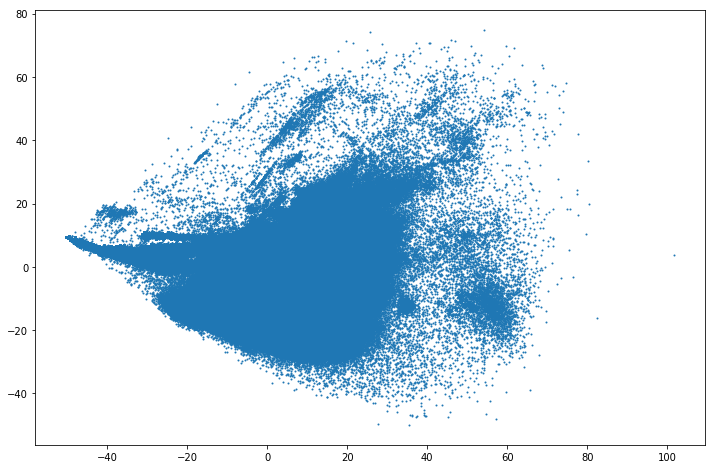

In [9]:
plt.figure(figsize=(12,8))
pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]
plt.scatter(pcaSample[:,0],pcaSample[:,1],s=1)

### Estadísticas móviles

#### Slider de la ventana

In [11]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    description='ventana:',
    readout=True,
    readout_format='d'
)
display(slider)

IntSlider(value=5, description='ventana:', max=10, min=1)

In [16]:
ventanaMedia = slider.value

datosEstadisticos = datosT.copy()
for i in range(1,13):
    nombre_col = 'P'+str(i)
    nombre_col_mean = nombre_col+' mean'
    datosEstadisticos[nombre_col_mean] = datosEstadisticos[nombre_col].rolling(ventanaMedia).mean()

datosEstadisticos.head()

ventanaDesviacion = ventanaMedia

for i in range(1,13):
    nombre_col = 'P'+str(i)
    nombre_col_std = nombre_col+' std'
    datosEstadisticos[nombre_col_std] = datosEstadisticos[nombre_col].rolling(ventanaDesviacion).std()

In [18]:
datosEstadisticos.head()
data = datosEstadisticos.dropna()
data = data.iloc[:,14:]
data.head() 

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
3,3.25,26.00,28.00,22.50,2.00,0.0,1.25,0.0,0.0,0.0,...,0.816497,0.57735,1.154701,0.0,0.957427,0.0,0.0,0.0,0.57735,0.0
4,3.50,25.75,28.00,22.50,2.00,0.0,1.25,0.0,0.0,0.0,...,0.816497,0.57735,1.154701,0.0,0.957427,0.0,0.0,0.0,0.57735,0.0
5,3.75,25.50,28.00,22.75,2.25,0.0,1.25,0.0,0.0,0.0,...,0.816497,0.50000,0.957427,0.0,0.957427,0.0,0.0,0.0,0.50000,0.0
6,3.50,25.50,28.00,22.75,2.25,0.0,1.50,0.0,0.0,0.0,...,0.816497,0.50000,0.957427,0.0,0.577350,0.0,0.0,0.0,0.50000,0.0
7,3.00,25.25,27.75,22.50,2.00,0.0,1.25,0.0,0.0,0.0,...,0.957427,0.57735,0.816497,0.0,0.500000,0.0,0.0,0.0,0.57735,0.0


In [23]:
medias = data.iloc[:,0:12]
desv = data.iloc[:,12:]

pcaM = PCA(n_components=2).fit_transform(medias)
pcaD = PCA(n_components=2).fit_transform(desv)
pcaMD = PCA(n_components=2).fit_transform(data)

In [ ]:
plt.figure(figsize=(24,12))

sct = [pcaM,pcaD,pcaMD]
for i in range(len(sct)):
    plt.subplot(3,1,i+1)
    pcaSample = sct[i]#sct[i][np.random.choice(sct[i].shape[0], int(4e4), replace=False), :]
    plt.scatter(pcaB[:,0],pcaB[:,1],s=1)